In [625]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import scipy.stats as stats

# Load the datasets
demographic = pd.read_csv('Dataset/demographic.csv')
examination = pd.read_csv('Dataset/examination.csv')
labs = pd.read_csv('Dataset/labs.csv')
questionnaire = pd.read_csv('Dataset/questionnaire.csv')

# Select relevant features from each dataset
# Demographic features
demo_features = demographic[['SEQN', 'RIAGENDR', 'RIDAGEYR']]
# Rename demographic columns
demo_features.columns = ['ID', 'Gender', 'Age']

# Examination features
exam_features = examination[['SEQN', 'BMXBMI', 'BPXDI1']]
# Rename examination columns
exam_features.columns = ['ID', 'BMI', 'BloodPressure'] # Diastolic = 張開 ; Systolic_BP = 收縮 ; Diastolic_BP = BloodPressure In Pima

# Lab features
lab_features = labs[['SEQN', 'LBXGLT', 'LBXIN']]  # LBXIN = Insulin (uU/mL) (no specify 2Hour)
# Rename lab columns
lab_features.columns = ['ID', 'Glucose', 'Insulin']

# Questionnaire features
quest_features = questionnaire[['SEQN', 'DIQ010']]
quest_features.columns = ['ID', 'Outcome']

# Merge all datasets
merged_data = demo_features.merge(exam_features, on='ID', how='left')\
    .merge(lab_features, on='ID', how='left')\
    .merge(quest_features, on='ID', how='left')

# Create category mappings
gender_map = {1: 'Male', 2: 'Female'}


# Apply mappings
merged_data['Gender'] = merged_data['Gender'].map(gender_map)


# Convert categorical variables to dummy variables
merged_data = pd.get_dummies(merged_data, columns=['Gender'])

# Load merged dataset information

In [627]:
# Load merged dataset information
merged_data

,ID,Age,BMI,BloodPressure,Glucose,Insulin,Outcome,Gender_Female,Gender_Male
0,73557,69,26.7,72.0,NaN,NaN,1.0,False,True
1,73558,54,28.6,62.0,NaN,NaN,1.0,False,True
2,73559,72,28.9,90.0,NaN,5.83,1.0,False,True
3,73560,9,17.1,38.0,NaN,NaN,2.0,False,True
4,73561,73,19.7,86.0,NaN,6.12,2.0,True,False
...,...,...,...,...,...,...,...,...,...
10170,83727,26,24.5,68.0,108.0,3.76,2.0,False,True
10171,83728,2,15.9,NaN,NaN,NaN,2.0,True,False
10172,83729,42,34.0,82.0,NaN,NaN,2.0,True,False
10173,83730,7,16.1,NaN,NaN,NaN,2.0,False,True


# Data type & Null count

In [629]:
# Data type & Null count
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10175 non-null  int64  
 1   Age            10175 non-null  int64  
 2   BMI            9055 non-null   float64
 3   BloodPressure  7172 non-null   float64
 4   Glucose        2345 non-null   float64
 5   Insulin        3093 non-null   float64
 6   Outcome        9769 non-null   float64
 7   Gender_Female  10175 non-null  bool   
 8   Gender_Male    10175 non-null  bool   
dtypes: bool(2), float64(5), int64(2)
memory usage: 576.4 KB


# Check for null values in the entire dataset

In [631]:
# Check for null values in the entire dataset
print("Null values in each column:")
print(merged_data.isnull().sum())

# Check for null values in specific columns
print("Null values in Age column: {0}".format(merged_data['Age'].isnull().sum()))
print("Null values in BMI column: {0}".format(merged_data['BMI'].isnull().sum()))
print("Null values in BloodPressure column: {0}".format(merged_data['BloodPressure'].isnull().sum()))
print("Null values in Glucose column: {0}".format(merged_data['Glucose'].isnull().sum()))
print("Null values in Insulin column: {0}".format(merged_data['Insulin'].isnull().sum()))


Null values in each column:
ID                  0
Age                 0
BMI              1120
BloodPressure    3003
Glucose          7830
Insulin          7082
Outcome           406
Gender_Female       0
Gender_Male         0
dtype: int64
Null values in Age column: 0
Null values in BMI column: 1120
Null values in BloodPressure column: 3003
Null values in Glucose column: 7830
Null values in Insulin column: 7082


# Fill null values with 0 in the entire dataset

In [633]:
# Fill null values with 0 in the entire dataset
merged_data = merged_data.fillna(0)

# Alternatively, fill null values with 0 in specific columns
merged_data['Age'] = merged_data['Age'].fillna(0)
merged_data['BMI'] = merged_data['BMI'].fillna(0)
merged_data['BloodPressure'] = merged_data['BloodPressure'].fillna(0)
merged_data['Glucose'] = merged_data['Glucose'].fillna(0)
merged_data['Insulin'] = merged_data['Insulin'].fillna(0)

# Check the dataset to ensure null values are replaced
print("Null values in each column after filling with 0:")
print(merged_data.isnull().sum())


Null values in each column after filling with 0:
ID               0
Age              0
BMI              0
BloodPressure    0
Glucose          0
Insulin          0
Outcome          0
Gender_Female    0
Gender_Male      0
dtype: int64


# Check if there have missing value (0) or not

In [635]:
# Check if there have missing value (0) or not
print("No. of rows with age 0 is: {0}".format(len(merged_data.loc[merged_data['Age'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(merged_data.loc[merged_data['BMI'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(merged_data.loc[merged_data['BloodPressure'] == 0])))
print("No. of rows with Glucose value 0 is: {0}".format(len(merged_data.loc[merged_data['Glucose'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(merged_data.loc[merged_data['Insulin'] == 0])))

No. of rows with age 0 is: 405
No. of rows with BMI 0 is: 1120
No. of rows with BloodPressure 0 is: 3086
No. of rows with Glucose value 0 is: 7830
No. of rows with Insulin 0 is: 7082


# Fill missing value (0) on BMI & BloodPressure by its mean

In [637]:
# Fill missing value (0) on BMI & BloodPressure by its mean
Fill_Mean = SimpleImputer(strategy='mean', missing_values=0)
Fill_Mean = Fill_Mean.fit(merged_data[['BloodPressure','BMI']])
merged_data[['BloodPressure','BMI']] = Fill_Mean.transform(merged_data[['BloodPressure','BMI']])

In [638]:
# Check if there have missing value (0) or not
print("No. of rows with age 0 is: {0}".format(len(merged_data.loc[merged_data['Age'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(merged_data.loc[merged_data['BMI'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(merged_data.loc[merged_data['BloodPressure'] == 0])))
print("No. of rows with Glucose value 0 is: {0}".format(len(merged_data.loc[merged_data['Glucose'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(merged_data.loc[merged_data['Insulin'] == 0])))

No. of rows with age 0 is: 405
No. of rows with BMI 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with Glucose value 0 is: 7830
No. of rows with Insulin 0 is: 7082


# Identify rows where 'Glucose', 'Insulin' is 0

In [640]:
# Identify rows where 'Glucose', 'Insulin' is 0

zero_Glucose_rows = merged_data['Glucose'] == 0
non_zero_Glucose_rows = merged_data['Glucose'] != 0

zero_insulin_rows = merged_data['Insulin'] == 0
non_zero_insulin_rows = merged_data['Insulin'] != 0

# Features for prediction (Insulin)

In [642]:
# Features for prediction (Insulin)
features_predict_Insulin = ['Age', 'BMI', 'BloodPressure'] ## Based on Correlation Matrix before Apply Polynomial Regression

# Apply Polynomial Regression to predict missing value (Insulin)

In [644]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(merged_data.loc[non_zero_insulin_rows, features_predict_Insulin])
X_poly_zero = poly.transform(merged_data.loc[zero_insulin_rows, features_predict_Insulin])

In [645]:
# Target variable
y_Insulin = merged_data.loc[non_zero_insulin_rows, 'Insulin']

In [646]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_Insulin)

LinearRegression()

# Predict missing 'Insulin' values

In [648]:
# Predict missing 'Insulin' values
predicted_insulin = model.predict(X_poly_zero)

# Fill the missing 'Insulin' values

In [650]:
# Fill the missing 'Insulin' values
merged_data.loc[zero_insulin_rows, 'Insulin'] = predicted_insulin

# Check if there have missing value (0) or not

In [652]:
# Check if there have missing value (0) or not
print("No. of rows with age 0 is: {0}".format(len(merged_data.loc[merged_data['Age'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(merged_data.loc[merged_data['BMI'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(merged_data.loc[merged_data['BloodPressure'] == 0])))
print("No. of rows with Glucose value 0 is: {0}".format(len(merged_data.loc[merged_data['Glucose'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(merged_data.loc[merged_data['Insulin'] == 0])))

No. of rows with age 0 is: 405
No. of rows with BMI 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with Glucose value 0 is: 7830
No. of rows with Insulin 0 is: 0


# Features for prediction (Glucose)

In [654]:
# Features for prediction (Glucose)
features_predict_Glucose = ['Age', 'BMI', 'BloodPressure', 'Insulin'] ## Based on Correlation Matrix before Apply Polynomial Regression

# Apply Polynomial Regression to predict missing value (Insulin)

In [656]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(merged_data.loc[non_zero_Glucose_rows, features_predict_Glucose])
X_poly_zero = poly.transform(merged_data.loc[zero_Glucose_rows, features_predict_Glucose])

In [657]:
# Target variable
y_Glucose = merged_data.loc[non_zero_Glucose_rows, 'Glucose']

In [658]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_Glucose)

LinearRegression()

# Predict missing 'Glucose' values

In [660]:
# Predict missing 'Glucose' values
predicted_Glucose = model.predict(X_poly_zero)

# Fill the missing 'Glucose' values

In [662]:
# Fill the missing 'Glucose' values
merged_data.loc[zero_Glucose_rows, 'Glucose'] = predicted_Glucose

In [663]:
# Check if there have missing value (0) or not
print("No. of rows with age 0 is: {0}".format(len(merged_data.loc[merged_data['Age'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(merged_data.loc[merged_data['BMI'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(merged_data.loc[merged_data['BloodPressure'] == 0])))
print("No. of rows with Glucose value 0 is: {0}".format(len(merged_data.loc[merged_data['Glucose'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(merged_data.loc[merged_data['Insulin'] == 0])))

No. of rows with age 0 is: 405
No. of rows with BMI 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with Glucose value 0 is: 0
No. of rows with Insulin 0 is: 0


# Load merged dataset information for checking

In [665]:
# Load merged dataset information for checking
merged_data

,ID,Age,BMI,BloodPressure,Glucose,Insulin,Outcome,Gender_Female,Gender_Male
0,73557,69,26.7,72.000000,138.507881,11.389659,1.0,False,True
1,73558,54,28.6,62.000000,121.637303,11.832734,1.0,False,True
2,73559,72,28.9,90.000000,134.279522,5.830000,1.0,False,True
3,73560,9,17.1,38.000000,85.027291,8.747508,2.0,False,True
4,73561,73,19.7,86.000000,133.195581,6.120000,2.0,True,False
...,...,...,...,...,...,...,...,...,...
10170,83727,26,24.5,68.000000,108.000000,3.760000,2.0,False,True
10171,83728,2,15.9,66.539992,98.897793,10.830165,2.0,True,False
10172,83729,42,34.0,82.000000,127.336336,18.030605,2.0,True,False
10173,83730,7,16.1,66.539992,96.616350,8.693402,2.0,False,True


# Check columns "Outcome" which larger than 2 ; 1=Get Diabetes, 2=No Diabetes

In [667]:
# Check columns "Outcome" which larger than 2 ; 1=Get Diabetes, 2=No Diabetes
print("No. of rows with Diabetes larger than 2 is: {0}".format(len(merged_data.loc[merged_data['Outcome'] >2])))

No. of rows with Diabetes larger than 2 is: 191


# Remove rows where the "Outcome" column value is greater than 2

In [669]:
# Remove rows where the "Outcome" column value is greater than 2
filtered_data = merged_data.loc[merged_data['Outcome'] <= 2]

# Remove the columns "Gender_Female" and "Gender_Male"

In [671]:
# Remove the columns "Gender_Female" and "Gender_Male"
filtered_data = filtered_data.drop(columns=['Gender_Female', 'Gender_Male'])

# Check the updated DataFrame
print("Columns after removal:")
print(filtered_data.columns)


Columns after removal:
Index(['ID', 'Age', 'BMI', 'BloodPressure', 'Glucose', 'Insulin', 'Outcome'], dtype='object')


# Check Statistics 

In [673]:
stat_filtered_data = filtered_data.describe().style 
stat_filtered_data

,ID,Age,BMI,BloodPressure,Glucose,Insulin,Outcome
count,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000
mean,78643.404147,31.042969,25.567341,66.472594,111.559189,13.506454,1.844852
std,2937.235500,24.309222,7.452678,11.030679,91.877284,11.430939,0.460900
min,73557.000000,0.000000,12.100000,4.000000,-8612.810917,-3.512876,0.000000
25%,76099.750000,9.000000,20.300000,62.000000,97.144257,8.238039,2.000000
50%,78641.500000,25.000000,25.678244,66.539992,106.920557,11.530658,2.000000
75%,81190.250000,51.000000,29.100000,72.000000,122.952655,17.175591,2.000000
max,83731.000000,80.000000,82.900000,122.000000,604.000000,682.480000,2.000000


# Load filtered data information

In [675]:
filtered_data

,ID,Age,BMI,BloodPressure,Glucose,Insulin,Outcome
0,73557,69,26.7,72.000000,138.507881,11.389659,1.0
1,73558,54,28.6,62.000000,121.637303,11.832734,1.0
2,73559,72,28.9,90.000000,134.279522,5.830000,1.0
3,73560,9,17.1,38.000000,85.027291,8.747508,2.0
4,73561,73,19.7,86.000000,133.195581,6.120000,2.0
...,...,...,...,...,...,...,...
10170,83727,26,24.5,68.000000,108.000000,3.760000,2.0
10171,83728,2,15.9,66.539992,98.897793,10.830165,2.0
10172,83729,42,34.0,82.000000,127.336336,18.030605,2.0
10173,83730,7,16.1,66.539992,96.616350,8.693402,2.0


In [676]:
#Replace 0 if it is orginally 2
filtered_data.loc[:, 'Outcome'] = filtered_data['Outcome'].replace({2: 0})

# Check the updated values
print("Updated Outcome column values:")
print(filtered_data['Outcome'].value_counts())



Updated Outcome column values:
Outcome
0.0    9247
1.0     737
Name: count, dtype: int64


In [677]:
filtered_data

,ID,Age,BMI,BloodPressure,Glucose,Insulin,Outcome
0,73557,69,26.7,72.000000,138.507881,11.389659,1.0
1,73558,54,28.6,62.000000,121.637303,11.832734,1.0
2,73559,72,28.9,90.000000,134.279522,5.830000,1.0
3,73560,9,17.1,38.000000,85.027291,8.747508,0.0
4,73561,73,19.7,86.000000,133.195581,6.120000,0.0
...,...,...,...,...,...,...,...
10170,83727,26,24.5,68.000000,108.000000,3.760000,0.0
10171,83728,2,15.9,66.539992,98.897793,10.830165,0.0
10172,83729,42,34.0,82.000000,127.336336,18.030605,0.0
10173,83730,7,16.1,66.539992,96.616350,8.693402,0.0


# Check Normal Distribution (Q-Q plot)

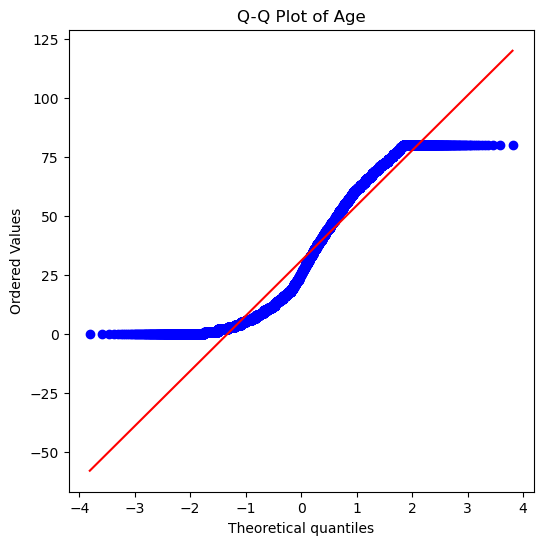

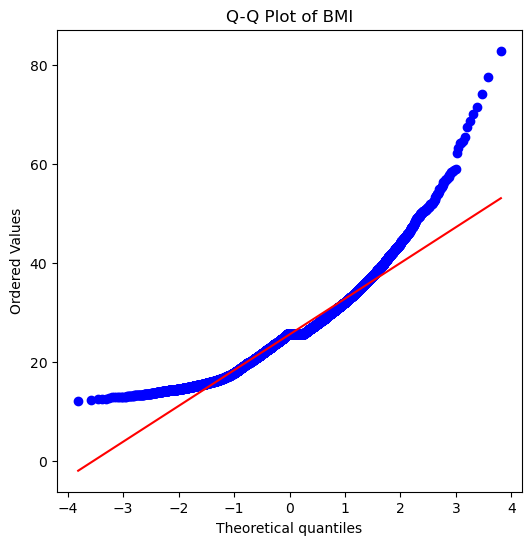

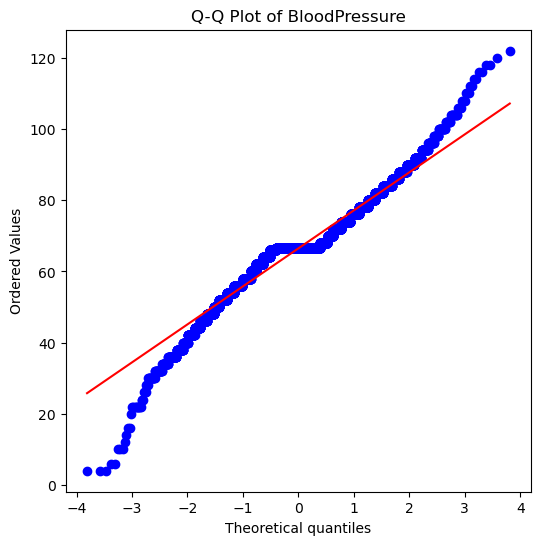

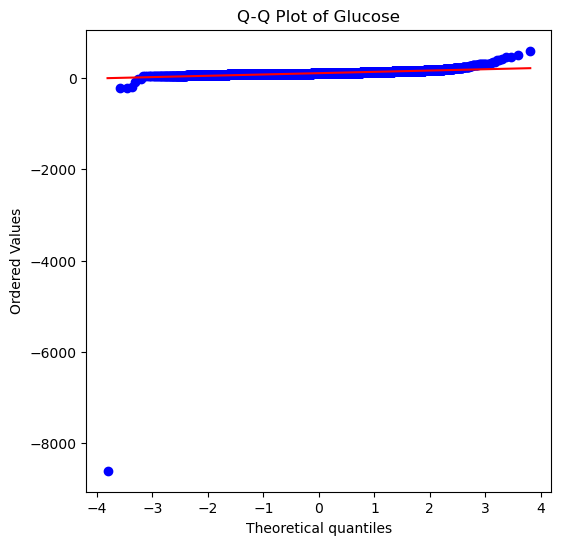

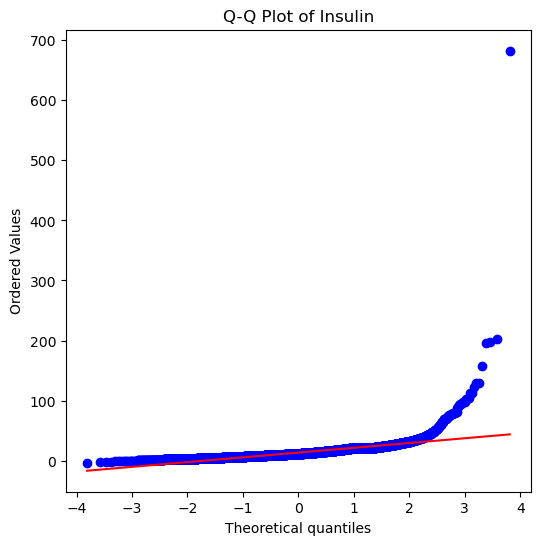

In [679]:
# Create Q-Q plots  
def qq_plot(data, feature):
    plt.figure(figsize=(6, 6))
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    plt.show()

# Plot Q-Q graphs for the features
for feature in ['Age', 'BMI', 'BloodPressure', 'Glucose', 'Insulin']:
    qq_plot(filtered_data, feature)
#df['Insulin_exp'] = df.Insulin**(1/1.2)
#qq_plot(df, 'Insulin')